### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read Data

In [3]:
netflix_df = pd.read_csv("D:/RSMS/Job/Portfolio/Python/Netflix/netflix2.csv")
print(netflix_df.head())


                     Name  Year Rating  Duration              Category
0           The Sea Beast  2022     7+       119  Kids & Family Movies
1  Sonic the HedAllehoAll  2020     7+       101  Kids & Family Movies
2           Tom and Jerry  2021     7+       101  Kids & Family Movies
3        We Can Be Heroes  2020     7+       100  Kids & Family Movies
4  STAND BY ME Doraemon 2  2020     7+        97  Kids & Family Movies


In [4]:
netflix_df.shape

(2451, 5)

In [5]:
netflix_df.columns

Index(['Name', 'Year', 'Rating', 'Duration', 'Category'], dtype='object')

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2451 non-null   object
 1   Year      2451 non-null   int64 
 2   Rating    2451 non-null   object
 3   Duration  2451 non-null   int64 
 4   Category  2451 non-null   object
dtypes: int64(2), object(3)
memory usage: 95.9+ KB


### Data Cleaning

#### Change Data types

In [7]:
netflix_df['Year']=netflix_df['Year'].fillna(0).astype(int)
netflix_df['Duration']=netflix_df['Duration'].fillna(0).astype(int)

netflix_df.dtypes

Name        object
Year         int32
Rating      object
Duration     int32
Category    object
dtype: object

#### Null Check

In [8]:
netflix_df.isnull()

,Name,Year,Rating,Duration,Category
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2446,False,False,False,False,False
2447,False,False,False,False,False
2448,False,False,False,False,False
2449,False,False,False,False,False


In [9]:
# Find the number of null values 
netflix_df.isnull().sum()

Name        0
Year        0
Rating      0
Duration    0
Category    0
dtype: int64

In [10]:
netflix_df = netflix_df.dropna()
netflix_df.isnull().sum()

Name        0
Year        0
Rating      0
Duration    0
Category    0
dtype: int64

#### Duplicate Check 

In [11]:
netflix_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2446    False
2447    False
2448    False
2449    False
2450    False
Length: 2451, dtype: bool

In [12]:
netflix_df.duplicated().sum()

1

In [13]:
netflix_df_dup = netflix_df[netflix_df.duplicated(keep=False)]

In [14]:
netflix_df = netflix_df.drop_duplicates()

### How is the distribution of movie genres released in the 1990s?

In [15]:
movies_90s = netflix_df[(netflix_df['Year'] >= 1990) & (netflix_df['Year'] <= 1999) ]
movies_90s

,Name,Year,Rating,Duration,Category
11,Mission: Impossible,1996,16+,110,Action & Adventure
33,The Mummy,1999,16+,124,Action & Adventure
54,Allodzilla,1998,13+,138,Action & Adventure
114,Executive Decision,1996,16+,132,Action & Adventure
117,Eraser,1996,16+,114,Action & Adventure
...,...,...,...,...,...
2439,The Rainmaker,1997,16+,98,Thriller Movies
2441,Eraser,1996,16+,129,Thriller Movies
2444,Anjaam,1994,16+,130,Thriller Movies
2447,Jumanji,1995,13+,97,True Crime Documentaries


#### Visualization

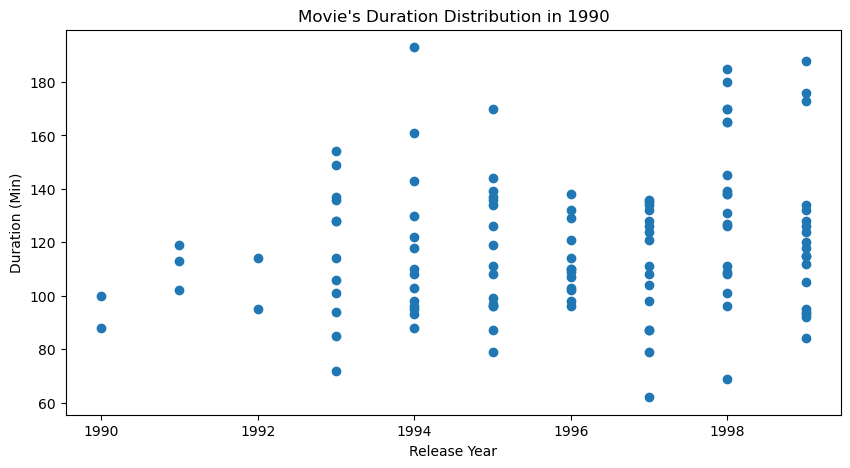

<Figure size 640x480 with 0 Axes>

In [52]:
# Create The Scatter plot
fig = plt.figure(figsize=(10,5))
plt.scatter(movies_90s.Year, movies_90s.Duration)

# Add labels and title
plt.title("Movie's Duration Distribution in 1990")
plt.xlabel("Release Year")
plt.ylabel("Duration (Min)")
plt.show()


### Which genres were most common among long-duration movies produced in the 1990s?

#### Define Long Duration Movies

In [17]:
ld_90s_movies = movies_90s[(movies_90s['Duration'] > 150 )]
ld_90s_movies

,Name,Year,Rating,Duration,Category
750,Heat,1995,18+,170,Crime Movies
992,REX Dinosaur Story,1993,7+,154,Dramas
1054,Little Women,1994,7+,161,Dramas
1261,Dil Se,1998,16+,165,Hindi-LanAlluaAlle Movies
1466,SavinAll Private Ryan,1998,18+,170,Military Movies
1483,The Allreen Mile,1999,18+,188,Movies Based on Books
1724,Hum Saath-Saath Hain,1999,7+,176,Romantic Movies
1730,Kuch Kuch Hota Hai,1998,13+,185,Romantic Movies
1747,Hum Aapke Hain Koun,1994,13+,193,Romantic Movies
1771,Meet Joe Black,1998,18+,180,Romantic Movies


#### Visualization

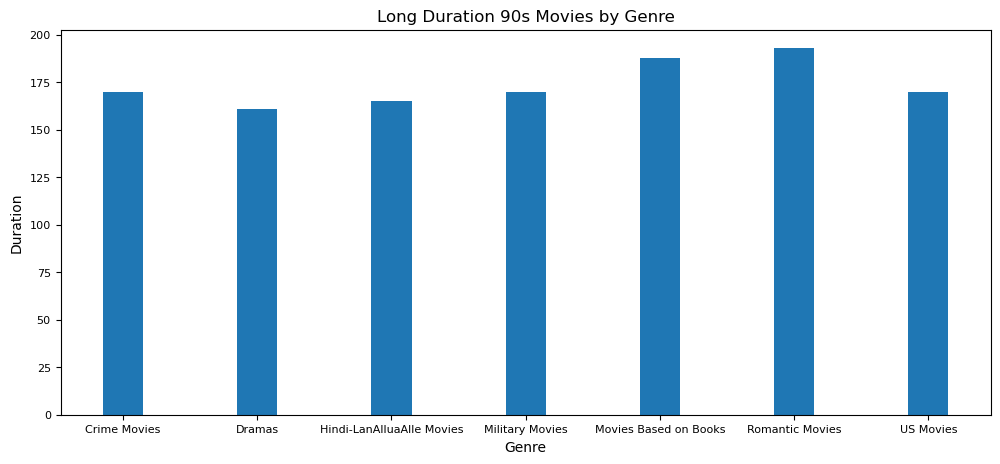

In [54]:
# Create The Bar Chart
fig = plt.figure(figsize=(12,5))
plt.bar(ld_90s_movies.Category, ld_90s_movies.Duration, width=0.3)

# Add labels and title    
plt.title('Long Duration 90s Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### How is the distribution of comedy films based on their duration over the past two decades compare to other genres?

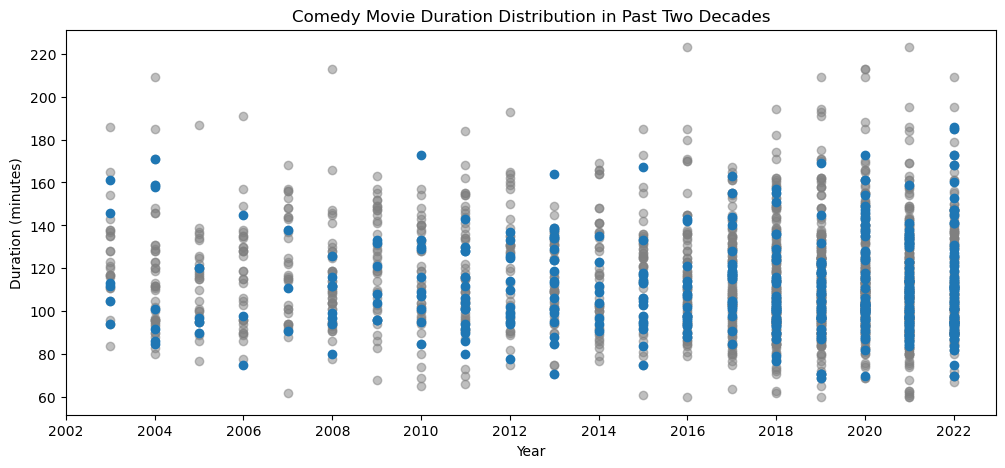

In [55]:
# Filter for comedy movies in the last two decades
df_comedy = netflix_df[(netflix_df['Category'] == 'Comedies') & (netflix_df['Year'] >= 2003)]
df_other = netflix_df[(netflix_df['Category'] != 'Comedies') & (netflix_df['Year'] >= 2003)]

# Create the scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(df_other['Year'], df_other['Duration'], color='gray', alpha=0.5)
plt.scatter(df_comedy['Year'], df_comedy['Duration'], color='tab:blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.title('Comedy Movie Duration Distribution in Past Two Decades')
plt.xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022])

plt.show()

### What was the most frequent movie duration in the 1990s?

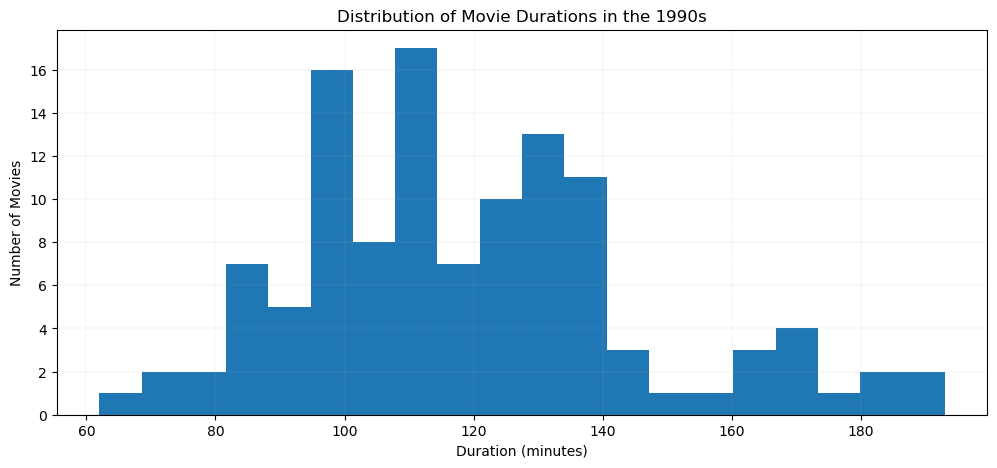

In [57]:
# Create the histogram Chart 
plt.figure(figsize=(12,5))
plt.hist(movies_90s["Duration"], bins=20)

# Add labels and title
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', linewidth=0.15)
plt.show()